# Importer les librairies

In [4]:
import pandas as pd 
# IMPORTER LES LIBRAIRIES NECESSAIRES A L'ETUDE
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

import statsmodels.api as sm
from sklearn.tree import DecisionTreeClassifier, plot_tree

# Importer les donn√©es

In [5]:
data = pd.read_csv("Data/titanic.csv")
data

PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                                                 ...     ...   ...    ...   
886                              Montvila, Rev. Juozas    male  27.0      0   
887                       Graham, Miss. Margaret Edith  female  19.0      0   
888           Johnston, Miss. Catherine Helen "Carrie"  female   NaN      1   
889                              Behr, Mr. Karl Howell    male  26.0      0   
890                                Dooley, Mr. Patrick    male  32.0      0   

     Parch            Ticket     Fare Cabin Embarked  
0        0         A/5 21171   7.2500   NaN        S  
1        0          PC 17599  71.2833   C85        C  
2        0  STON/O2. 3101282   7.9250   NaN        S  
3        0            113803  53.1000  C123        S  
4        0            373450   8.0500   NaN        S  
..     ...               ...      ...   ...      ...  
886      0            211536  13.0000   NaN        S  
887      0            112053  30.0000   B42        S  
888      2        W./C. 6607  23.4500   NaN        S  
889      0            111369  30.0000  C148        C  
890      0            370376   7.7500   NaN        Q  

[891 rows x 12 columns]

# Questions

## 1. Pr√©paration des donn√©es

Remplissez la function `preprocess` ci-dessus. Celle-ci doit:
1. Supprimez les colonnes `PassengerId`, `Name`, `Ticket`, `Cabin`.
2. Supprimez les lignes contenant au moins une valeur manquante.
3. Cr√©er une variable `FamilySize` qui est correspond √† `SibSp` + `Parch` + 1. Supprimez les variables `SibSp` et `Parch`.
4. Recalculer le prix du billet `Fare` en divisant `Fare` par `FamilySize`.
5. Encoder les variables qualitatives `Sex`, `Embarked` avec l'argument `drop_first=True`.

In [6]:
def preprocess(data: pd.DataFrame) -> pd.DataFrame:
    
    """La fonction pr√©pare les donn√©es √† l'analyse.
    
    Args:
        data (pd.DataFrame): La dataframe originale
        
    Returns:
        pd.DataFrame: La dataframe preprocess√© et pr√™te √† √™tre analys√©e.
    """
    
    # Faire une copy de la dataframe originale
    data_preprocessed = data.copy()
    
    # Supprimez les variables `PassengerId`, `Name`, `Ticket` & `Cabin`
    data_preprocessed = data_preprocessed.drop(columns=["PassengerId", "Name", "Ticket", "Cabin"])
    
    # Supprimez lignes contenant au moins une valeur manquante
    data_preprocessed = data_preprocessed.dropna()
    
    # Cr√©er une variable `FamilySize` et supprimez les variables `SibSp` et `Parch`
    data_preprocessed["FamilySize"] = data_preprocessed["SibSp"] + data_preprocessed["Parch"] + 1
    data_preprocessed = data_preprocessed.drop(columns=["SibSp", "Parch"])
    
    # Recalculer le prix du billet
    data_preprocessed["Fare"] = data_preprocessed["Fare"] / data_preprocessed["FamilySize"]
    
    # Encode (OHE) `Sex` & `Embarked`
    data_preprocessed = pd.get_dummies(data_preprocessed, columns=["Sex", "Embarked"], drop_first=True)
    
    
    # CHECK: NE PAS TOUCHER
    for col in ["PassengerId", "Name", "Ticket", "Cabin", "SibSp", "Parch"]:
        assert col not in data_preprocessed, f"{col} n'a pas √©t√© retir√©."
    assert data_preprocessed.isna().sum().sum() == 0, "Il reste encore des NaN √† supprimer."
    assert "FamilySize" in data_preprocessed.columns, "La colonne `FamilySize` n'a pas √©t√© cr√©√©e."
    assert data_preprocessed.loc[0, "Fare"] == 3.625, "La colonne `Fare` n'a pas √©t√© recalcul√©e."
    for col in [col for col in data_preprocessed if col.startswith("Embarked")]:
        assert data_preprocessed[col].nunique() == 2, f"{col} n'a pas √©t√© encod√©."
    for col in [col for col in data_preprocessed if col.startswith("Sex")]:
        assert data_preprocessed[col].nunique() == 2, f"{col} n'a pas √©t√© encod√©."
    
    return data_preprocessed

Le r√©sultat de la function doit vous donner exactement le tableau ci-dessous.

In [7]:
# Preprocess les donn√©es √† l'aide de la function `preprocess`
data_clean = preprocess(data)
display(data_clean)

Survived  Pclass   Age       Fare  FamilySize  Sex_male  Embarked_Q  \
0           0       3  22.0   3.625000           2      True       False   
1           1       1  38.0  35.641650           2     False       False   
2           1       3  26.0   7.925000           1     False       False   
3           1       1  35.0  26.550000           2     False       False   
4           0       3  35.0   8.050000           1      True       False   
..        ...     ...   ...        ...         ...       ...         ...   
885         0       3  39.0   4.854167           6     False        True   
886         0       2  27.0  13.000000           1      True       False   
887         1       1  19.0  30.000000           1     False       False   
889         1       1  26.0  30.000000           1      True       False   
890         0       3  32.0   7.750000           1      True        True   

     Embarked_S  
0          True  
1         False  
2          True  
3          True  
4          True  
..          ...  
885       False  
886        True  
887        True  
889       False  
890       False  

[712 rows x 8 columns]

## 2. Inf√©rence statistique (4 pts)

**Q1: L'√¢ge moyen des passagers du Titanic est-il le m√™me que l'√¢ge moyen de la population en 1912 (28 ans)?**

***1. Identifier la ou les variables d‚Äôint√©r√™t et sp√©cifier le type***
  
La variable d'int√©r√™t pour cette question est l'<b>√¢ge</b> des passagers du Titanic, dans notre cas c'est une variable de type <b>quantitative continue</b>.  
- var : Age (quantitative continue)

***2. R√©aliser une visualisation appropri√©e selon les variables***

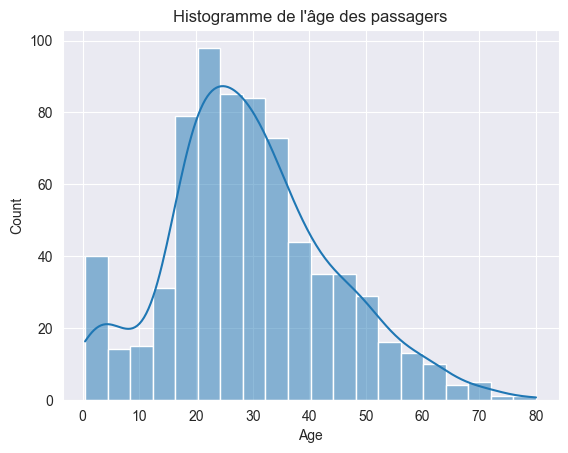

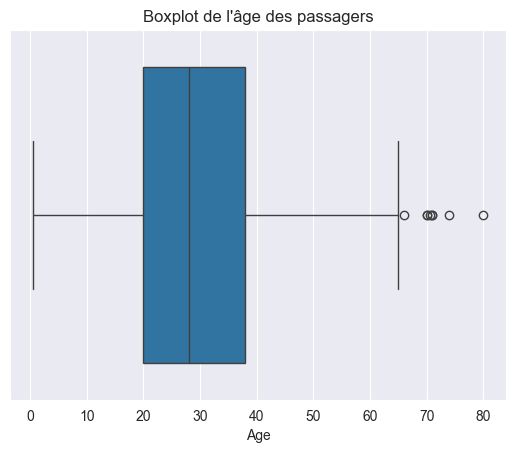

In [8]:
sns.histplot(
    data=data_clean,
    x="Age",
    kde=True
)
plt.title("Histogramme de l'√¢ge des passagers")
plt.show()

sns.boxplot(
    data=data_clean,
    x="Age"
)
plt.title("Boxplot de l'√¢ge des passagers")
plt.show()

***3. Enoncer une hypoth√®se nulle et alternative***
- <b>H0</b> : il n'existe pas de diff√©rence entre l'√¢ge moyen des passagers du Titanic et celui de la population (Œº = 28)  
- <b>H1</b> : il existe une diff√©rence significative entre l'√¢ge moyen des passagers du Titanic et celui de la population (Œº ‚â† 28)

***4. Identifier le test statistique appropri√©***
  
Le test appropri√© dans ce cas l√† est un <b>t-test</b>, √©tant donn√© qu'on compare la moyenne d'un √©chantillon avec celle de la population, qu'on a qu'une variable, que cette variable est quantitative et qu'on ne conna√Æt pas la variance ou l'√©cart-type de la population.

***5. V√©rifier la validation des postulats du t-test***
- L'√©chantillon n'est pas vraiment al√©atoire, √©tant donn√© qu'il est constitu√© des passagers du Titanic, qui sont un sous-groupe sp√©cifique de la population (personnes ayant les moyens d'acheter un billet de b√¢teau et l'envie)
- La taille de l'√©chantillon est de 712, ce qui est bien sup√©rieur √† 30, donc m√™me si la distribution n'est pas id√©ale (comme montr√© sur l'histogramme ci-dessus), c'est tout de m√™me valid√©

In [9]:
n = len(data_clean)

print("La taille de l'√©chantillon est de : " + str(n))

La taille de l'√©chantillon est de : 712


***6. Calculer la statistique t et la p-valeur***

Avec une statistique t de ~3.02, on peut dire que la diff√©rence entre la moyenne d'√¢ge des passagers du titanic et de celle de la population est cons√©quente.    
  
Avec une p-valeur de ~0.0026, il y a 0.0026% de chance d'observer une moyenne d'√¢ge aussi √©trange, dans un √©chantillon al√©atoire, que celle qu'on a pour les passagers du Titanic, si on assume que H0 est vraie.

In [10]:
ages = np.array(data_clean["Age"])

t, p_valeur = stats.ttest_1samp(ages, popmean=28)

print("La statistique t est de : " + str(t))
print("La p-valeur associ√©e est de : " + str(p_valeur))

La statistique t est de : 3.0233009800374053
La p-valeur associ√©e est de : 0.002590259537786662


***7. Prendre une d√©cision selon la p-valeur (alpha 5%)***

Avec un seuil alpha de 0.05 et notre p-valeur, on a suffisament de preuve pour rejeter l'hypoth√®se nulle. Les preuves soutiennent le fait qu'il y ait une diff√©rence significative entre l'√¢ge moyen des passagers du Titanic et celui de la population.

In [11]:
alpha = 0.05

if p_valeur < alpha:
    print("Avec un seuil alpha", str(alpha), "on rejette l'hypoth√®se nulle.")
else:
    print("Avec un seuil alpha", str(alpha), "on ne rejette pas l'hypoth√®se nulle.")

Avec un seuil alpha 0.05 on rejette l'hypoth√®se nulle.


***8. Interpr√©ter le r√©sultat et √©valuer la taille de l‚Äôeffet***  
  
On aper√ßoit que, <b>statistiquement</b>, la moyenne d'√¢ge des passagers du Titanic (~29.6) est significativement diff√©rente de celle de la population en 1912 (28).  
Avec un d de Cohen de ~0.11, on peut dire que l'effet est faible.  
  
La diff√©rence entre la moyenne des √¢ges des passagers du Titanic et de celle de la population en 1912 est statistiquement diff√©rente. Mais en r√©alit√©, cette diff√©rence est faible.

In [12]:
moyenne_ages = np.mean(ages)
ecart_type_ages = np.std(ages, ddof=1)
d_cohen = (moyenne_ages - 28) / ecart_type_ages

print("La moyenne des √¢ges est de : " + str(moyenne_ages))
print("L'√©cart-type des √¢ges est de : " + str(ecart_type_ages))
print("Le d de Cohen est de : " + str(d_cohen))

La moyenne des √¢ges est de : 29.64209269662921
L'√©cart-type des √¢ges est de : 14.49293290032352
Le d de Cohen est de : 0.11330299449551398


**Q2: La survie d√©pend-elle de la classe du passager?**

***1. Identifier la ou les variables d‚Äôint√©r√™t et sp√©cifier le type***
  
Les variable que nous avons d√©termin√© pour cette question sont : l'<b>√©tat de survie</b> des passagers du Titanic et leur <b>classe</b>, ce sont les deux des variables de type <b>qualitative nominale</b>.  
- var 1 : Survived (qualitative nominale)  
- var 2 : Pclass (qualitative nominale)

***2. R√©aliser une visualisation appropri√©e selon les variables***

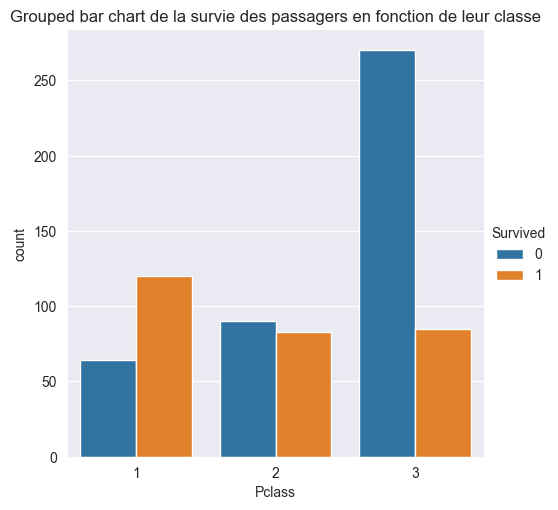

In [13]:
sns.catplot(
    data=data_clean,
    x="Pclass",
    hue="Survived",
    kind="count"
)
plt.title("Grouped bar chart de la survie des passagers en fonction de leur classe")
plt.show()

***3. Enoncer une hypoth√®se nulle et alternative***
- <b>H0</b> : la survie du passager est ind√©pendante de sa classe  
- <b>H1</b> : la survie du passager n'est pas ind√©pendante de sa classe

***4. Identifier le test statistique appropri√©***
  
Le test appropri√© dans ce cas l√† est un <b>test de ùúí^2 d‚Äôind√©pendance</b>, √©tant donn√© qu'on a deux variables et que ces variables sont qualitatives.

***5. V√©rifier la validation des postulats du test de ùúí^2 d‚Äôind√©pendance***
- L'√©chantillon n'est pas vraiment al√©atoire, √©tant donn√© qu'il est constitu√© des passagers du Titanic, qui sont un sous-groupe sp√©cifique de la population (personnes ayant les moyens d'acheter un billet de b√¢teau et l'envie)
- Comme montr√© √† l'aide du tableau ci-dessous, il y a plus de 5 valeurs par combinaison, c'est donc valid√©

In [14]:
tab_contingence = pd.crosstab(data_clean["Survived"], data_clean["Pclass"])

print(tab_contingence)


Pclass      1   2    3
Survived              
0          64  90  270
1         120  83   85


***6. Calculer la statistique et la p-valeur***

Avec une statistique de ~91.08, on peut dire qu'il y a une √©norme d√©pendance entre la survie du passager et sa classe.  
  
Avec une p-valeur de ~1.67e-20, il y a un pourcentage extr√™mement petit d'observer une d√©pendance aussi √©trange entre la survie et la classe des passager, dans un √©chantillon al√©atoire, si on assume que H0 est vraie.

In [15]:
chi2_stat, p_val, dof, ex = stats.chi2_contingency(tab_contingence)

print("La statistique est de : " + str(chi2_stat))
print("La p-valeur est de : " + str(p_val))
print("Le degr√© de libert√© est de : " + str(dof))
print("Les valeurs attendues sont : " + str(ex))

La statistique est de : 91.08074548791019
La p-valeur est de : 1.6675060315554636e-20
Le degr√© de libert√© est de : 2
Les valeurs attendues sont : [[109.57303371 103.02247191 211.40449438]
 [ 74.42696629  69.97752809 143.59550562]]


***7. Prendre une d√©cision selon la p-valeur (alpha 5%)***

Avec un seuil alpha de 0.05 et notre p-valeur, on a suffisament de preuve pour rejeter l'hypoth√®se nulle. Les preuves soutiennent le fait qu'il y ait une d√©pendance forte entre la survie et la classe du passager.

In [16]:
if p_val < alpha:
    print("Avec un seuil alpha", str(alpha), "on rejette l'hypoth√®se nulle.")
else:
    print("Avec un seuil alpha", str(alpha), "on ne rejette pas l'hypoth√®se nulle.")

Avec un seuil alpha 0.05 on rejette l'hypoth√®se nulle.


***8. Interpr√©ter le r√©sultat et √©valuer la taille de l‚Äôeffet***  
  
On aper√ßoit que, <b>statistiquement</b>, il y a une d√©pendance assez significative entre la survie des passagers et leur classe.  
Avec un V de Cramer de ~0.36, on peut dire que l'effet est moyen.

Donc, plus le passager a une classe √©lev√©e (1√®re classe √©tant la plus √©lev√©e), plus il a de chance de survivre.

In [17]:
v_cramer = np.sqrt(chi2_stat / (len(data_clean) * (min(tab_contingence.shape) - 1)))

print("Le V de Cramer est de : " + str(v_cramer))

Le V de Cramer est de : 0.35766240415815087


**Q3: Existe-t-il une diff√©rence d'√¢ge entre les passagers qui ont surv√©cu et les passagers d√©c√©d√©s?**

***1. Identifier la ou les variables d‚Äôint√©r√™t et sp√©cifier le type***
  
Les variable que nous avons d√©termin√© pour cette question sont : l'<b>√¢ge</b> des passagers du Titanic et leur <b>√©tat de survie</b>, l'√¢ge est de type <b>quantitative continue</b> et l'√©tat de survie est de type <b>qualitative nominale</b>.  
- var 1 : Age (quantitative discr√®te)  
- var 2 : Survived (qualitative nominale)

***2. R√©aliser une visualisation appropri√©e selon les variables***

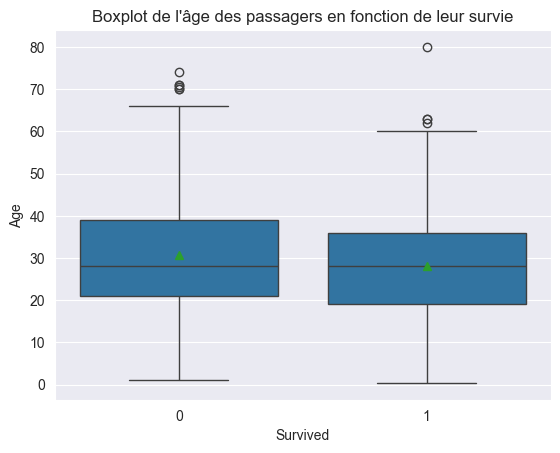

In [18]:
sns.boxplot(
    data=data_clean,
    x="Survived",
    y="Age",
    showmeans=True
)
plt.title("Boxplot de l'√¢ge des passagers en fonction de leur survie")
plt.show()

***3. Enoncer une hypoth√®se nulle et alternative***
- <b>H0</b> : il n'existe pas de diff√©rence d'√¢ge entre les passagers qui ont surv√©cu et ceux qui sont d√©c√©d√©s (Œº1 = Œº2)  
- <b>H1</b> : il existe une diff√©rence d'√¢ge significative entre les passagers qui ont surv√©cu et ceux qui sont d√©c√©d√©s (Œº1 ‚â† Œº2)

***4. Identifier le test statistique appropri√©***
  
Le test appropri√© dans ce cas l√† est un <b>t-test √† deux √©chantillons</b>, √©tant donn√© qu'on a deux variables, qu'une de ces variables est de type quantitative et que l'autre est de type qualitative (dichotomique).

***5. V√©rifier la validation des postulats du t-test √† deux √©chantillons***
- Les √©chantillons ne sont pas vraiment al√©atoire, √©tant donn√© qu'ils sont constitu√©s des passagers du Titanic, qui sont un sous-groupe sp√©cifique de la population (personnes ayant les moyens d'acheter un billet de b√¢teau et l'envie)
- Les √©chantillons sont ind√©pendants car il y a un √©chantillon qui concerne les passagers qui n'ont pas surv√©cu tandis que l'autre concerne ceux qui ont surv√©cu
- La taille des √©chantillons, qui est de 424 pour ceux qui n'ont pas surv√©cu et 288 pour ceux qui ont surv√©cu, est bien sup√©rieur √† 30

In [19]:
n_not_survived = len(data_clean[data_clean["Survived"] == 0])
n_survived = len(data_clean[data_clean["Survived"] == 1])

print("La taille de l'√©chantillon des passagers n'ayant pas surv√©cu est de : " + str(n_not_survived))
print("La taille de l'√©chantillon des passagers ayant surv√©cu est de : " + str(n_survived))

La taille de l'√©chantillon des passagers n'ayant pas surv√©cu est de : 424
La taille de l'√©chantillon des passagers ayant surv√©cu est de : 288


***6. Calculer la statistique et la p-valeur***

Avec une statistique t de ~2.18, on peut dire que la diff√©rence entre la moyenne d'√¢ge des passagers du titanic qui ont surv√©cu et de celle des passagers qui n'ont pas surv√©cu est cons√©quente.  
  
Avec une p-valeur de ~0.03, il y a 0.03% de chance d'observer une diff√©rence aussi √©trange entre ces moyennes d'√¢ge, dans un √©chantillon al√©atoire, si on assume que l'hypth√®se nulle est vraie.

In [20]:
ages_not_survived = np.array(data_clean[data_clean["Survived"] == 0]["Age"])
ages_survived = np.array(data_clean[data_clean["Survived"] == 1]["Age"])

t, p_valeur = stats.ttest_ind(
    ages_not_survived,
    ages_survived,
    alternative="two-sided",
    equal_var=False
)

print("La statistique t est de : " + str(t))
print("La p-valeur associ√©e est de : " + str(p_valeur))

La statistique t est de : 2.184486214939826
La p-valeur associ√©e est de : 0.02931497754601072


***7. Prendre une d√©cision selon la p-valeur (alpha 5%)***

Avec un seuil alpha de 0.05 et notre p-valeur, on a suffisament de preuve pour rejeter l'hypoth√®se nulle. Les preuves soutiennent le fait qu'il y ait une diff√©rence significative entre les deux moyennes.

In [21]:
if p_valeur < alpha:
    print("Avec un seuil alpha", str(alpha), "on rejette l'hypoth√®se nulle.")
else:
    print("Avec un seuil alpha", str(alpha), "on ne rejette pas l'hypoth√®se nulle.")

Avec un seuil alpha 0.05 on rejette l'hypoth√®se nulle.


***8. Interpr√©ter le r√©sultat et √©valuer la taille de l‚Äôeffet***  
  
On aper√ßoit que, <b>statistiquement</b>, la moyenne d'√¢ge des passagers du Titanic ayant surv√©cu (~28.19) est significativement diff√©rente de celle de ceux qui n'ont pas surv√©cu (~30.63).  
Avec un d de Cohen de ~0.17 en valeur absolue, on peut dire que l'effet est faible.  
  
La diff√©rence entre la moyenne des √¢ges des passagers du Titanic ayant surv√©cu et de celle de ceux qui n'ont pas surv√©cu est statistiquement diff√©rente. Mais en r√©alit√©, cette diff√©rence est faible.

In [22]:
moyenne_ages_survived = np.mean(ages_survived)
moyenne_ages_not_survived = np.mean(ages_not_survived)
d_cohen = (moyenne_ages_survived - moyenne_ages_not_survived) / ecart_type_ages

print("La moyenne des √¢ges des passagers ayant surv√©cu est de : " + str(moyenne_ages_survived))
print("La moyenne des √¢ges des passagers n'ayant pas surv√©cu est de : " + str(moyenne_ages_not_survived))
print("L'√©cart-type des √¢ges est de : " + str(ecart_type_ages))
print("Le d de Cohen est de : " + str(d_cohen))

La moyenne des √¢ges des passagers ayant surv√©cu est de : 28.19329861111111
La moyenne des √¢ges des passagers n'ayant pas surv√©cu est de : 30.62617924528302
L'√©cart-type des √¢ges est de : 14.49293290032352
Le d de Cohen est de : -0.16786668722640677


**Q4: Existe-t-il une relation entre l'√¢ge des passagers et le prix des billets?**

***1. Identifier la ou les variables d‚Äôint√©r√™t et sp√©cifier le type***
  
Les variable que nous avons d√©termin√© pour cette question sont : l'<b>√¢ge</b> des passagers du Titanic et le <b>prix du billet</b>, ce sont les deux des variables de type <b>quantitative continue</b>.  
- var 1 : Age (quantitative continue)
- var 2 : Fare (quantitative continue)

***2. R√©aliser une visualisation appropri√©e selon les variables***

L'axy y est en √©chelle logarithmique afin de mieux voir le scatter plot.

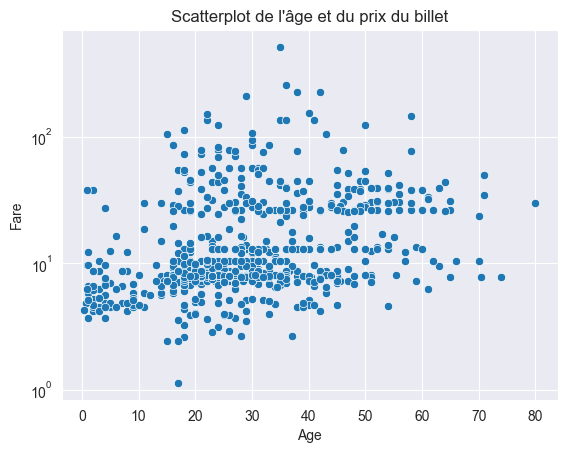

In [23]:
sns.scatterplot(
    data=data_clean,
    x="Age",
    y="Fare"
)
plt.yscale("log")
plt.title("Scatterplot de l'√¢ge et du prix du billet")
plt.show()

***3. Enoncer une hypoth√®se nulle et alternative***
- <b>H0</b> : il n'y a pas de corr√©lation entre l'√¢ge des passagers et le prix du billet (ùúå = 0)
- <b>H1</b> : il y a une corr√©lation significative entre l'√¢ge des passagers et le prix du billet (ùúå ‚â† 0)

***4. Identifier le test statistique appropri√©***
  
Le test appropri√© dans ce cas l√† est un <b>t-test pour la corr√©lation</b>, √©tant donn√© qu'on a deux variables, que ces deux variables sont de type quantitative.

***5. V√©rifier la validation des postulats du t-test pour la corr√©lation***
- Les donn√©es sont quantitatives mais l'√©chantillon n'est pas vraiment al√©atoire, √©tant donn√© qu'il est constitu√© des passagers du Titanic, qui sont un sous-groupe sp√©cifique de la population (personnes ayant les moyens d'acheter un billet de b√¢teau et l'envie)
- Le scatter plot ne montre aucune liaison
- Il y a certaines valeurs qui sont abberantes
- Les deux variables ne suivent pas une loi normale

Comme les postulats ne sont pas respect√©s, il n'y a pas de raison de poursuivre cette analyse, car les r√©sultats ne voudront pas dire grand chose.

## 3. Data mining (2 pts)

**Q1: Effectuer une analyse statistique √† l'aide de la r√©gression logistique avec comme variable d√©pendente la variable `Survived`. Interpr√©ter les coefficients et discuter de leur importance statistique en vous appuyant sur leur p-valeur.**

In [24]:
print(data_clean.dtypes)

data_clean_reg_log = data_clean.astype({col: 'int' for col in data_clean.select_dtypes(include=['bool']).columns})

X = data_clean_reg_log.drop(columns=["Survived"])
y = data_clean_reg_log["Survived"]

Survived        int64
Pclass          int64
Age           float64
Fare          float64
FamilySize      int64
Sex_male         bool
Embarked_Q       bool
Embarked_S       bool
dtype: object


In [25]:
model = sm.Logit(
    y,
    sm.add_constant(X)
)

model_fit = model.fit()

print(model_fit.summary())

Optimization terminated successfully.
         Current function value: 0.445519
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:               Survived   No. Observations:                  712
Model:                          Logit   Df Residuals:                      704
Method:                           MLE   Df Model:                            7
Date:                Sun, 15 Jun 2025   Pseudo R-squ.:                  0.3398
Time:                        14:14:00   Log-Likelihood:                -317.21
converged:                       True   LL-Null:                       -480.45
Covariance Type:            nonrobust   LLR p-value:                 1.324e-66
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          5.7251      0.659      8.691      0.000       4.434       7.016
Pclass        -1.1795      0.

In [26]:
coefs = model_fit.params.tolist()

coefs

[5.7250986011401706,
 -1.1794912526464782,
 -0.04183154633377716,
 0.003010467594464039,
 -0.193409387543726,
 -2.65474610140251,
 -0.8290537688375387,
 -0.4111051053739089]

In [27]:
odds_ratio = np.exp(model_fit.params)

pd.DataFrame(odds_ratio, columns=["Odds Ratio"])

Odds Ratio
const       306.463481
Pclass        0.307435
Age           0.959031
Fare          1.003015
FamilySize    0.824145
Sex_male      0.070317
Embarked_Q    0.436462
Embarked_S    0.662917

**D√©tails par variable**
  
***Pclass (coef = -1.1795, p=0.000, OR ‚âà 0.31):***
- Sens : Un coefficient n√©gatif de -1.1795 signifie que plus la classe (Pclass) augmente (i.e. passer de 1 ‚Üí 2 ‚Üí 3), plus la probabilit√© de survie diminue.
- Magnitude (odds ratio) : e^(-1.1795) ‚âà 0.31. Autrement dit, si Pclass augmente de 1 unit√© (ex. de la 1 ≥·µâ √† la 2·µâ classe, ou de la 2·µâ √† la 3·µâ), les chances (odds) de survie sont multipli√©es par ~0.31 (soit diminu√©es d‚Äôenviron 69%).
- Significativit√© : p=0.000, effet statistiquement tr√®s significatif.  
  
***Age (coef = -0.0418, p=0.000, OR ‚âà 0.96):***
- Sens : Un coefficient n√©gatif indique qu‚Äô√† mesure que l‚Äô√¢ge augmente, la probabilit√© de survie diminue l√©g√®rement.
- Magnitude : e^(-0.0418) ‚âà 0.96, donc chaque ann√©e suppl√©mentaire est associ√©e √† une r√©duction d‚Äôenviron 4% des chances de survie (toutes choses √©gales par ailleurs).
- Significativit√© : p=0.000, effet statistiquement tr√®s significatif.  
  
***Fare (coef = 0.0030, p=0.457, OR ‚âà 1.003):***
- Sens : Le coefficient est l√©g√®rement positif, mais pas significatif (p=0.457 > 0.05). On ne peut donc pas conclure que le prix du billet (Fare) exerce un effet notable sur la survie dans ce mod√®le, une fois les autres variables prises en compte.
- Magnitude : e^(0.0030) ‚âà 1.003, ~0.3% d‚Äôaugmentation des odds par unit√© suppl√©mentaire de Fare, mais vu la p-valeur, cette estimation n‚Äôest pas jug√©e fiable/statistiquement significative.  
  
***FamilySize (coef = -0.1934, p=0.009, OR ‚âà 0.82):***
- Sens : Coefficient n√©gatif, donc plus la taille de la famille est grande, plus les chances de survie diminuent selon ce mod√®le.
- Magnitude : e^(-0.1934) ‚âà 0.82, soit une baisse de ~18% des chances de survie par personne suppl√©mentaire dans la famille.
- Significativit√© : p=0.009 (< 0.05), donc effet jug√© significatif.  
  
***Sex_male (coef = -2.6547, p=0.000, OR ‚âà 0.07):***
- Sens : √ätre un homme (Sex_male=1) diminue fortement la probabilit√© de survie (r√©f√©rence = femme).
- Magnitude : e^(-2.6547) ‚âà 0.07, c‚Äôest-√†-dire que les hommes ont ~93% de chances en moins (1 ‚àí 0.07 = 0.93) de survivre par rapport aux femmes, toutes choses √©gales par ailleurs.
- Significativit√© : p=0.000, effet hautement significatif.  
  
***Embarked_Q (coef = -0.8291, p=0.165, OR ‚âà 0.44):***
- Sens : L‚Äôembarquement au port ‚ÄòQ‚Äô a un coefficient n√©gatif, mais la p-valeur (0.165) > 0.05.
- Conclusion : On ne peut pas conclure √† un effet significatif de l‚Äôembarquement √† ‚ÄòQ‚Äô sur la survie.  
  
***Embarked_S (coef = -0.4111, p=0.128, OR ‚âà 0.66):***  
- Sens : L‚Äôembarquement au port ‚ÄòS‚Äô donne un coefficient n√©gatif de -0.41, mais p=0.128 > 0.05.
- Conclusion : Pas de preuve statistique qu‚Äôembarquer √† ‚ÄòS‚Äô influe significativement sur les chances de survie, dans ce mod√®le.

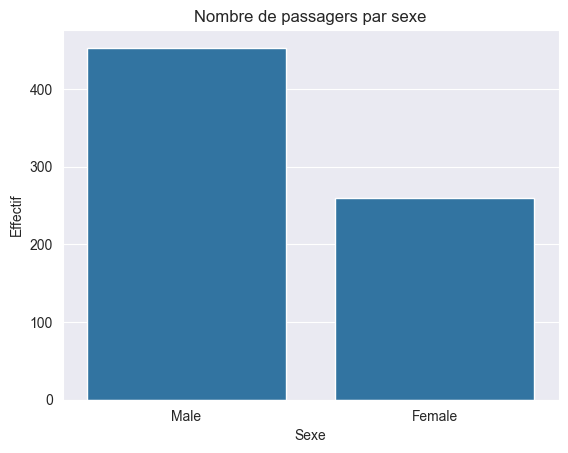

Male/Female ratio = 1.749034749034749


In [28]:
# mappage pour plus de clart√©
data_clean['Sex_label'] = data_clean['Sex_male'].map({True: 'Male', False: 'Female'})

# bar chart du nombre de passagers Male vs Female
sns.countplot(data=data_clean, x="Sex_label")
plt.title("Nombre de passagers par sexe")
plt.xlabel("Sexe")
plt.ylabel("Effectif")
plt.show()
#ratio d'homme pour chaque femme
print(
    "Male/Female ratio =",
    data_clean['Sex_male'].value_counts()[True] / data_clean['Sex_male'].value_counts()[False]
)

**Discussion**

***Sex_male (coef fortement n√©gatif) :***  
Le fait d‚Äô√™tre un homme sur le Titanic diminue fortement la probabilit√© de survie, et cela s‚Äôexplique en partie par la r√®gle tacite ‚ÄúFemmes et enfants d‚Äôabord.‚Äù D'ailleurs, et comme vu dans le graphe ci dessus, il est important de noter qu‚Äôil y avait environ 1,7 fois plus d‚Äôhommes que de femmes √† bord (donc, pour chaque groupe de 10 femmes, on comptait 17 hommes). Dans un contexte o√π le nombre de places sur les canots de sauvetage √©tait limit√©, cette proportion plus √©lev√©e de passagers masculins a sans doute amplifi√© la concurrence pour s‚Äô√©chapper. Ainsi, non seulement les hommes √©taient souvent pri√©s de laisser la priorit√© aux femmes et aux enfants, mais ils √©taient √©galement plus nombreux, ce qui renforce la probabilit√© que beaucoup d‚Äôentre eux se retrouvent sans place sur les canots.  
  
***Pclass (n√©gatif) :***  
Plus la classe est √©lev√©e (1√®re classe), meilleures sont les chances de survie. Les passagers de 3√®me classe ont souvent √©t√© log√©s dans des ponts plus bas, avec un acc√®s plus compliqu√© aux canots de sauvetage (https://courses.bowdoin.edu/history-2203-fall-2020-kmoyniha/reflection/). La variable Pclass capture donc le d√©s√©quilibre dans les opportunit√©s de fuite, l‚Äôacc√®s √† l‚Äôinformation et √† la proximit√© des canots.

***Age (n√©gatif) :***  
Plus on vieillit, moins on a la force ou l‚Äôagilit√© pour se frayer un chemin vers les canots. Par ailleurs, si l‚Äôon observe que les plus jeunes survivent davantage, cela peut venir du fait qu‚Äôon ait effectivement privil√©gi√© les ‚Äúenfants‚Äù dans le sauvetage. Ce r√©sultat nuance le ‚ÄúFemmes et enfants d‚Äôabord‚Äù pour les plus √¢g√©s, qui ont peut-√™tre eu moins de capacit√© ou de chances de s‚Äôen sortir.

***FamilySize (n√©gatif) :***  
Un effet parfois inattendu, mais dans un sc√©nario dramatique comme le Titanic, voyager en famille nombreuse pouvait paradoxalement r√©duire les chances de survie. On pourrait imaginer qu‚Äôune personne tentant de secourir plusieurs proches ralentit sa propre √©vacuation. Par exemple, un p√®re de famille qui essaie de r√©unir sa femme (ou son homme!!!) et quatre enfants est susceptible de perdre un temps pr√©cieux, voire de se sacrifier pour en sauver un maximum.

**Q2: Effectuer une analyse statistique √† l'aide d'un arbre de classification avec comme variable d√©pendente la variable `Survived` et une profondeur maximale de 4. Visualiser l'arbre et expliquer quelques d√©cisions.**

In [29]:
model = DecisionTreeClassifier(max_depth=4)

model_fit = model.fit(X, y)

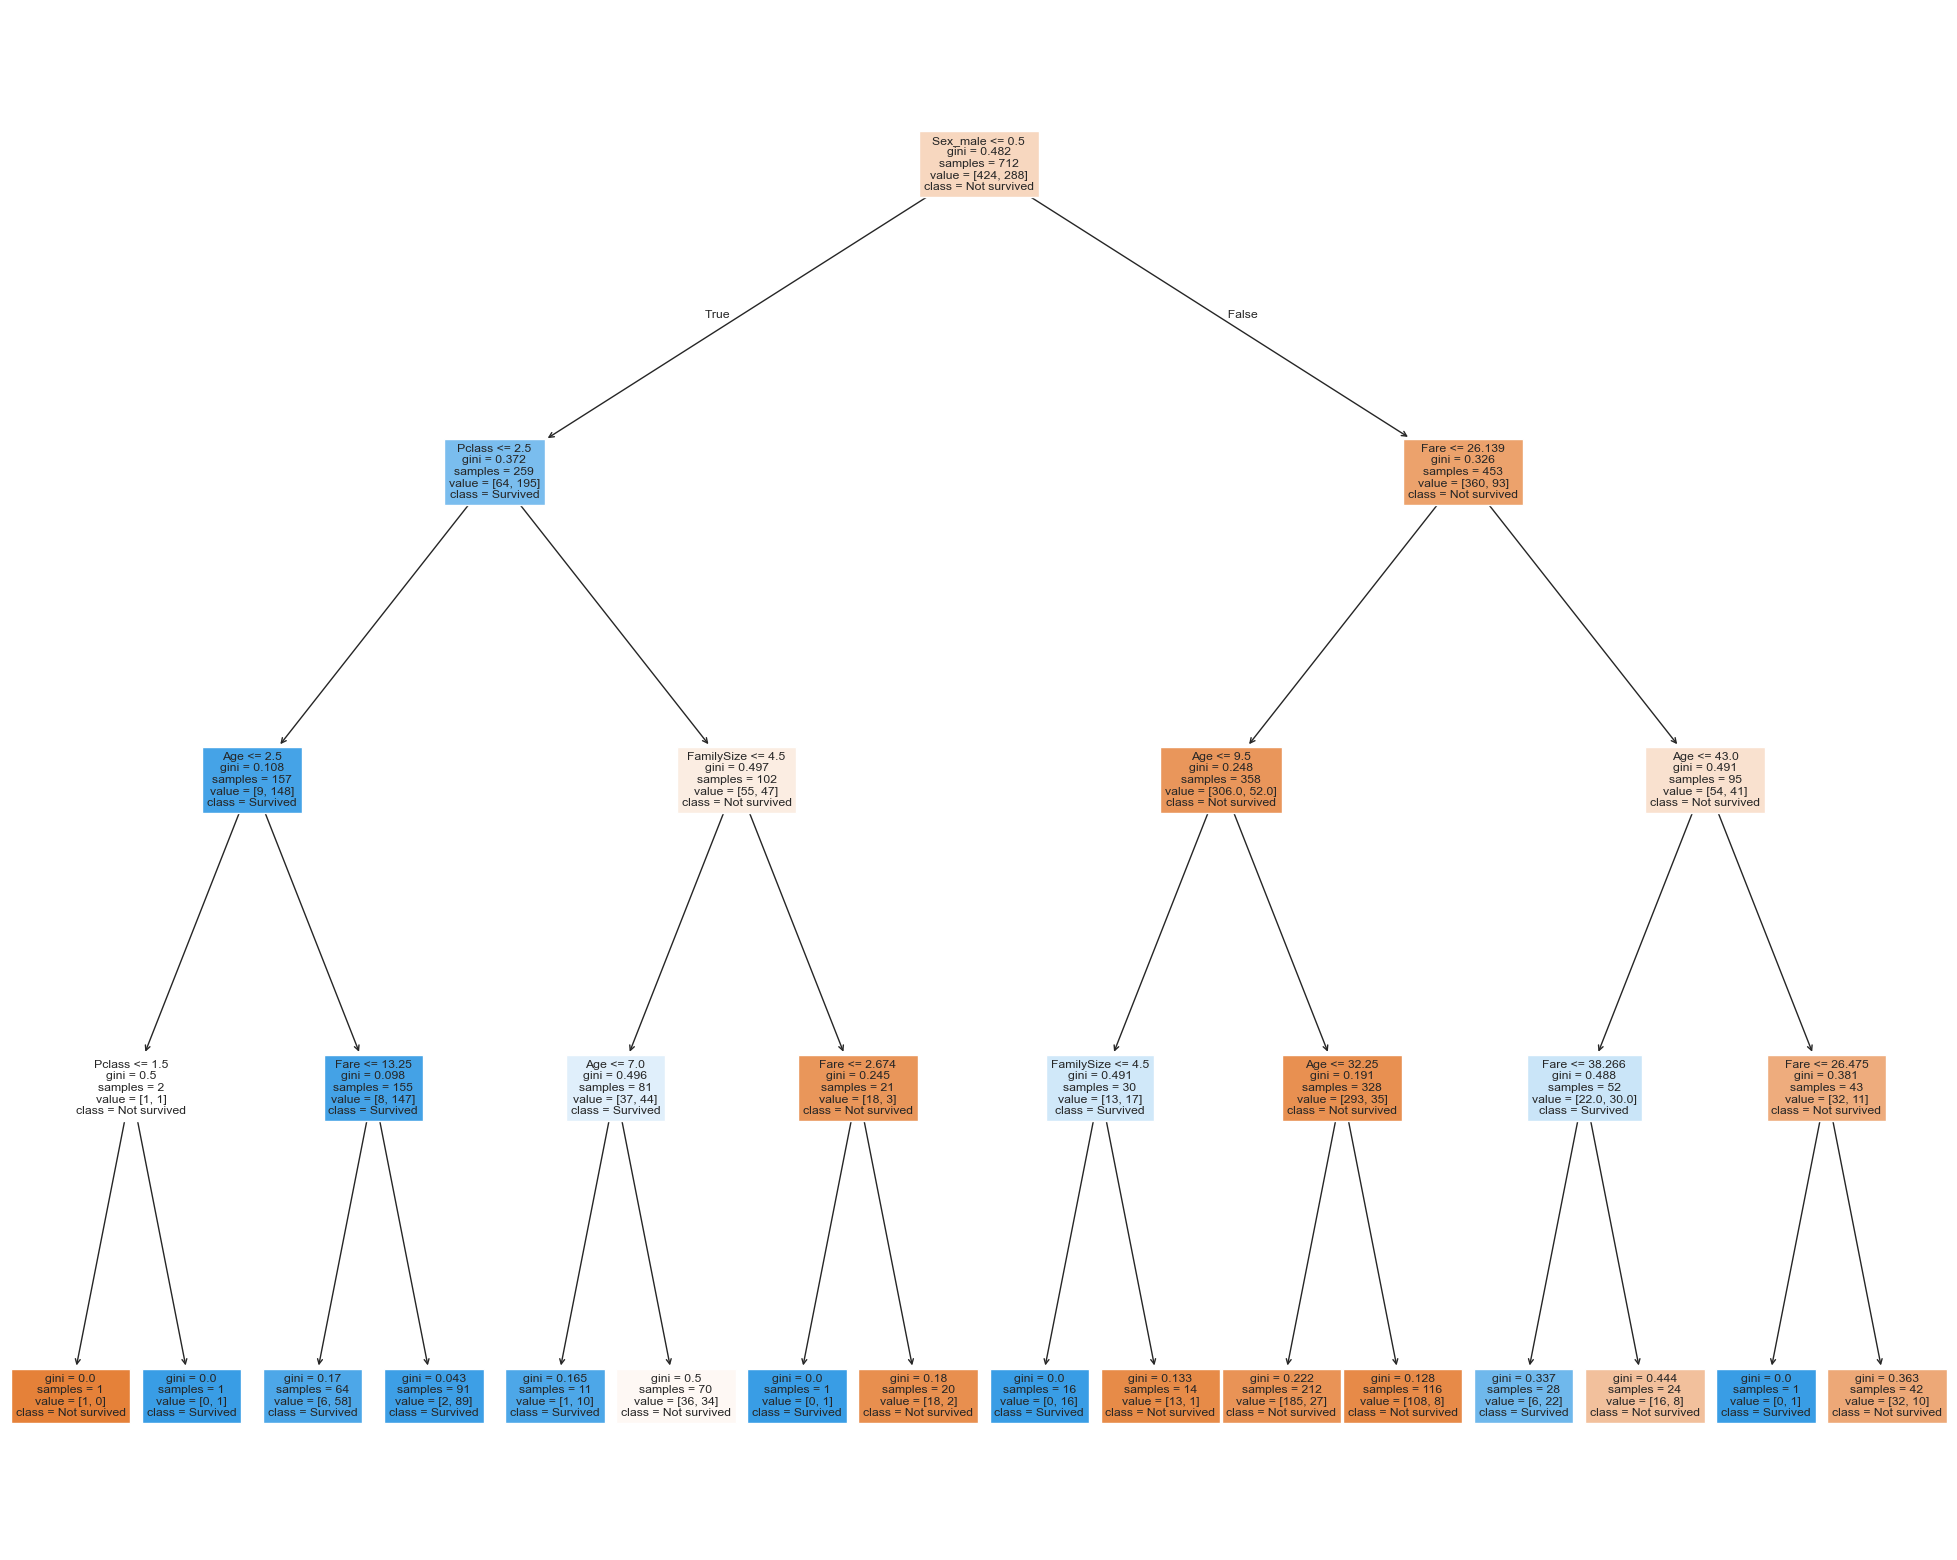

In [30]:
fig = plt.figure(figsize=(25, 20))
_ = plot_tree(
    model,
    feature_names=X.columns.tolist(),
    class_names=["Not survived", "Survived"],
    filled=True
)

***Racine :***

La toute premi√®re question est‚ÄØ: Sex_male <= 0.5?

Si la r√©ponse est ‚ÄúTrue‚Äù (donc Sex_male=0, c‚Äôest-√†-dire une femme), on part vers la branche de gauche.

Si c‚Äôest ‚ÄúFalse‚Äù (donc Sex_male=1, un homme), on va vers la branche de droite.

C‚Äôest coh√©rent avec l‚Äôimportance de la variable ‚ÄúSexe‚Äù dans la survie‚ÄØ: l‚Äôarbre s√©pare tout de suite femmes et hommes.

***Branche ‚ÄúFemmes‚Äù (gauche), 2·µâ question : Pclass <= 2.5?***

Si ‚ÄúOui‚Äù (premi√®re ou deuxi√®me classe), on continue le sous-arbre (encore √† gauche) o√π l‚Äôon affine sur l‚Äô√Çge ou Fare.

Si ‚ÄúNon‚Äù (troisi√®me classe), on aboutit √† une autre sous-branche.

Cette d√©cision indique que chez les femmes, √™tre en 1 ≥·µâ/2·µâ classe versus en 3·µâ classe est un crit√®re majeur pour la survie.

***Exemple de n≈ìud plus bas : Age <= 2.5 (femmes, 1 ≥·µâ/2·µâ classe).***

Si ‚ÄúOui‚Äù (donc Age ‚â§ 2,5 ans‚ÄØ!), il s‚Äôagit d‚Äôenfants en tr√®s bas √¢ge‚ÄØ: presque tous survivent (le n≈ìud final est ‚ÄúSurvived‚Äù).

Si ‚ÄúNon‚Äù, l‚Äôarbre regarde parfois Fare <= 13.2 ou d‚Äôautres variables pour d√©partager.

On voit ici le fameux ‚ÄúFemmes et enfants d‚Äôabord‚Äù, avec un taux de survie encore plus √©lev√© si l‚Äôenfant est vraiment jeune.

***Branche ‚ÄúHommes‚Äù (droite), 2·µâ question : Fare <= 26.159***

Pour les hommes ayant pay√© un billet peu cher (moins de ~26‚ÄØ¬£), on va sur la branche de gauche, autrement on descend √† droite o√π on teste ensuite Age, FamilySize, etc.

Cela refl√®te l‚Äôid√©e qu‚Äôun homme en 3·µâ classe (ou billet bon march√©) est souvent dans une situation d√©favorable‚ÄØ; l‚Äôarbre affine ensuite selon l‚Äô√¢ge ou la taille de la famille.

***Exemple de feuille :***
on voit par exemple une feuille not√©e ‚Äúclass = Survived‚Äù avec un certain nombre d‚Äôobservations, par exemple si Sex_male=0.5 (femme), Pclass <= 2.5, Age <= 2.5, etc. Ce n≈ìud final indique qu‚Äôune tr√®s large majorit√© des observations sur ce chemin ont surv√©cu, donc l‚Äôarbre les classe comme ‚ÄúSurvived‚Äù.

***FamilySize <= 4.5 appara√Æt aussi :***

L‚Äôarbre juge qu‚Äôau-del√† d‚Äôune famille de plus de 4 ou 5 personnes, les chances de survie sont moindres (dans plusieurs branches). On voit donc que chez des hommes ou femmes avec un FamilySize √©lev√©, l‚Äôarbre tend √† pr√©dire ‚ÄúNot Survived‚Äù.

En r√©sum√©, l‚Äôarbre hi√©rarchise ainsi‚ÄØ: d‚Äôabord le sexe (variable la plus discriminante), puis la classe et le prix du billet, puis l‚Äô√¢ge (avec un effet tr√®s marqu√© pour les tout-petits), et enfin la taille de la famille. Chaque chemin aboutit √† une d√©cision (Survived / Not Survived) en fonction du n≈ìud terminal.